,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


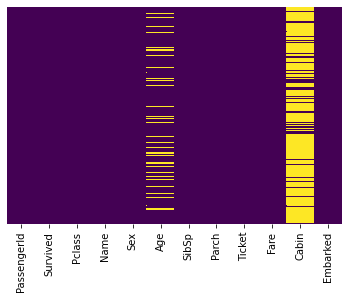

In [3]:
#Importing libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

sns.heatmap(train_data.isnull(), yticklabels=False,cbar=False,cmap='viridis')

test_data.head()


In [4]:
# Rounding of the float numbers

train_data['Age'] = train_data['Age'].apply(np.ceil)
test_data['Age'] = test_data['Age'].apply(np.ceil)

In [5]:
# Filling the missing value

train_data['Embarked'] = train_data.Embarked.fillna('S')


In [6]:
# Filling the missing value

test_data['Fare'] = test_data.Fare.fillna('35.62')

In [7]:
#Checking the last rows of data

train_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [8]:
# use knn_imputer to impute the missing values

from sklearn.impute import KNNImputer

subset = train_data[['Age','Pclass']]

impute = KNNImputer(n_neighbors=7)
data = np.around(impute.fit_transform(subset))

new_age = pd.DataFrame(data,columns=['age','pclass'])
new_age.tail()

subset_test = test_data[['Age','Pclass']]

impute = KNNImputer(n_neighbors=7)
data_test = np.around(impute.fit_transform(subset_test))

new_age_test = pd.DataFrame(data_test,columns=['age','pclass'])
#new_age_test.tail()
new_age.tail()

,age,pclass
886,27.0,2.0
887,19.0,1.0
888,25.0,3.0
889,26.0,1.0
890,32.0,3.0


In [9]:
#Merging the dataframes-train data

train = pd.merge(train_data, new_age, left_index=True, right_index=True)
train.drop(columns=['Cabin','Age'], axis=1, inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Embarked     891 non-null    object 
 10  age          891 non-null    float64
 11  pclass       891 non-null    float64
dtypes: float64(3), int64(5), object(4)
memory usage: 69.7+ KB


In [10]:
#Merging the dataframes-test data

test = pd.merge(test_data, new_age_test, left_index=True, right_index=True)
test.drop(columns=['Cabin','Age'], axis=1, inplace=True)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Ticket       418 non-null    object 
 7   Fare         418 non-null    object 
 8   Embarked     418 non-null    object 
 9   age          418 non-null    float64
 10  pclass       418 non-null    float64
dtypes: float64(2), int64(4), object(5)
memory usage: 27.8+ KB


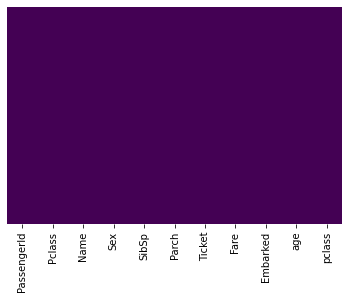

In [11]:
#Checking Null values in HeatMap

sns.heatmap(test.isnull(), yticklabels=False,cbar=False,cmap='viridis')

In [12]:
#Dispaly the Test dataframe information

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Ticket       418 non-null    object 
 7   Fare         418 non-null    object 
 8   Embarked     418 non-null    object 
 9   age          418 non-null    float64
 10  pclass       418 non-null    float64
dtypes: float64(2), int64(4), object(5)
memory usage: 27.8+ KB


In [13]:
#Dropping the columns in train data

train.drop(columns=['Name','pclass','Ticket','Fare'],axis=1, inplace=True)

In [14]:
#Dropping the columns in test data

test.drop(columns=['Name','pclass','Ticket','Fare'],axis=1, inplace=True)

In [15]:
#Replacing the object type to integer datatype

train['Sex'] = train['Sex'].replace({'male':0,'female':1})

test['Sex'] = test['Sex'].replace({'male':0,'female':1})

In [16]:
#Dispaly the Train dataframe information

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Embarked     891 non-null    object 
 7   age          891 non-null    float64
dtypes: float64(1), int64(6), object(1)
memory usage: 52.3+ KB


In [17]:
#train['Pclass'] = train['Pclass'].replace([1,2,3],['FirstClass','SecondClass','ThirdClass'])
#test['Pclass'] = test['Pclass'].replace([1,2,3],['FirstClass','SecondClass','ThirdClass'])

In [18]:
#Checking the first 5 rows of data

test.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,age
0,892,3,0,0,0,Q,35.0
1,893,3,1,1,0,S,47.0
2,894,2,0,0,0,Q,62.0
3,895,3,0,0,0,S,27.0
4,896,3,1,1,1,S,22.0


In [19]:
#Adding new features to training data

train['relatives'] = train['Parch'] + train['SibSp']
train.loc[train['relatives'] > 0, 'alone'] = 0
train.loc[train['relatives'] == 0, 'alone'] = 1
train['alone'] = train['alone'].astype('int64')
train.drop(columns=['relatives','Parch','SibSp'],inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Embarked     891 non-null    object 
 5   age          891 non-null    float64
 6   alone        891 non-null    int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 45.3+ KB


In [20]:
#Adding new features to test data

test['relatives'] = test['Parch'] + test['SibSp']
test.loc[test['relatives'] > 0, 'alone'] = 0
test.loc[test['relatives'] == 0, 'alone'] = 1
test['alone'] = test['alone'].astype('int64')
test.drop(columns=['relatives','Parch','SibSp'],inplace=True)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Embarked     418 non-null    object 
 4   age          418 non-null    float64
 5   alone        418 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 18.0+ KB


In [21]:
#Dispaly the Test dataframe information

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Embarked     418 non-null    object 
 4   age          418 non-null    float64
 5   alone        418 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 18.0+ KB


In [22]:
#Seprating the Age into bins

bins = [0,4,17,60,99]
labels =['Toddler','Child','Adult','Elderly']

#bins = [0,11,18,22,27,33,40,60,99]
#labels =['0','1','2','3','4','5','6','7']

cat = pd.cut(train['age'], bins = bins, labels=labels)

cat_test = pd.cut(test['age'], bins = bins, labels = labels)


In [23]:
#Ordering the columns

train.insert(2, 'Age', cat)
#train.drop(columns=['age'], axis=1, inplace=True)

test.insert(2, 'Age' , cat_test)
#test.drop(columns=['age'], axis=1, inplace=True)


In [24]:
#Dropping the extra columns

train.drop(columns=['age'], inplace=True)

test.drop(columns=['age'], inplace=True)

In [25]:
#Dispaly the dataframe information

test.info()
train.info()
#train[['Age']] = train[['Age']].astype('int64')

#test[['Age']] = test[['Age']].astype('int64')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    int64   
 1   Pclass       418 non-null    int64   
 2   Age          418 non-null    category
 3   Sex          418 non-null    int64   
 4   Embarked     418 non-null    object  
 5   alone        418 non-null    int64   
dtypes: category(1), int64(4), object(1)
memory usage: 15.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Age          891 non-null    category
 3   Pclass       891 non-null    int64   
 4   Sex          891 non-null    int64   
 5   Embarked     891 non-null    object  
 6   alone        891 non-null    int64 

In [26]:
#Convert categorical variable into dummy/indicator variables - train data

model_train = pd.get_dummies(train)
model_train.head()

,PassengerId,Survived,Pclass,Sex,alone,Age_Toddler,Age_Child,Age_Adult,Age_Elderly,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,0,0,0,0,1,0,0,0,1
1,2,1,1,1,0,0,0,1,0,1,0,0
2,3,1,3,1,1,0,0,1,0,0,0,1
3,4,1,1,1,0,0,0,1,0,0,0,1
4,5,0,3,0,1,0,0,1,0,0,0,1


In [27]:
#Convert categorical variable into dummy/indicator variables - test data

model_test = pd.get_dummies(test)
model_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Pclass       418 non-null    int64
 2   Sex          418 non-null    int64
 3   alone        418 non-null    int64
 4   Age_Toddler  418 non-null    uint8
 5   Age_Child    418 non-null    uint8
 6   Age_Adult    418 non-null    uint8
 7   Age_Elderly  418 non-null    uint8
 8   Embarked_C   418 non-null    uint8
 9   Embarked_Q   418 non-null    uint8
 10  Embarked_S   418 non-null    uint8
dtypes: int64(4), uint8(7)
memory usage: 16.0 KB


In [28]:
# Splitting the train test data

X = model_train.drop(columns=['Survived','PassengerId'], axis=1)
y = model_train['Survived']

test_final = model_test.drop('PassengerId' ,axis=1)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [29]:
#Checking the shape of rows and columns

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((623, 10), (623,), (268, 10), (268,))

# LogisticRegression

In [31]:
#LogisticRegression

#Machine Learning Models: Training and Evaluation

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

model_logistic = LogisticRegression()
model_logistic.fit(X_train, y_train)

y_pred = model_logistic.predict(X_test)

y_pred_test = model_logistic.predict(test_final)



traning_acc_lr = model_logistic.score(X_train,y_train)
testing_acc_lr = accuracy_score(y_test,y_pred)

print('............. LOGISTIC REGRESSION METRICS ...............')
print('Training Accuracy :',traning_acc_lr)
print('Testing Accuracy  :',testing_acc_lr)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


............. LOGISTIC REGRESSION METRICS ...............
Training Accuracy : 0.7993579454253612
Testing Accuracy  : 0.8022388059701493
[[138  16]
 [ 37  77]]
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       154
           1       0.83      0.68      0.74       114

    accuracy                           0.80       268
   macro avg       0.81      0.79      0.79       268
weighted avg       0.81      0.80      0.80       268



# Random Forest

In [33]:
#Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

Y_predRf = random_forest.predict(X_test)

y_pred_test_rf = random_forest.predict(test_final)

traning_acc_rf = random_forest.score(X_train,y_train)
testing_acc_rf = accuracy_score(y_test,Y_predRf)

print('............. RANDOM FOREST METRICS ...............')
print('Training Accuracy :',traning_acc_rf)
print('Testing Accuracy  :',testing_acc_rf)
print(confusion_matrix(y_test,Y_predRf))
print(classification_report(y_test,Y_predRf))

............. RANDOM FOREST METRICS ...............
Training Accuracy : 0.8443017656500803
Testing Accuracy  : 0.7835820895522388
[[147   7]
 [ 51  63]]
              precision    recall  f1-score   support

           0       0.74      0.95      0.84       154
           1       0.90      0.55      0.68       114

    accuracy                           0.78       268
   macro avg       0.82      0.75      0.76       268
weighted avg       0.81      0.78      0.77       268



In [34]:
#Submission Result

submission = pd.DataFrame({
           'PassengerID' : model_test['PassengerId'],
           'Survived' : y_pred_test
})

submission.shape

submission.to_csv('submission_4.csv', index=False)



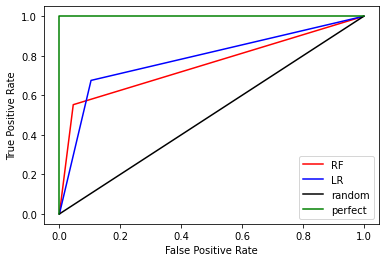

In [35]:
#Metrics of ROC_curve

from sklearn.metrics import roc_curve

fpr_RF, tpr_RF, thresholds_RF = roc_curve(y_test,Y_predRf)

fpr_LR, tpr_LR, thresholds_LR = roc_curve(y_test,y_pred)


plt.plot(fpr_RF, tpr_RF,'r-',label = 'RF')
plt.plot(fpr_LR,tpr_LR,'b-', label= 'LR')
plt.plot([0,1],[0,1],'k-',label='random')
plt.plot([0,0,1,1],[0,1,1,1],'g-',label='perfect')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()



AUC RF:0.754
AUC LR:0.786


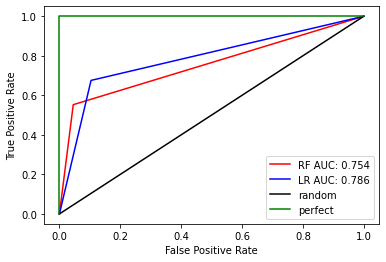

In [36]:
#Metrics of ROC_AUC_curve

from sklearn.metrics import roc_auc_score

auc_RF = roc_auc_score(y_test,Y_predRf)
auc_LR = roc_auc_score(y_test,y_pred)

print('AUC RF:%.3f'% auc_RF)
print('AUC LR:%.3f'% auc_LR)

plt.plot(fpr_RF, tpr_RF,'r-',label = 'RF AUC: %.3f'%auc_RF)
plt.plot(fpr_LR,tpr_LR,'b-', label= 'LR AUC: %.3f'%auc_LR)
plt.plot([0,1],[0,1],'k-',label='random')
plt.plot([0,0,1,1],[0,1,1,1],'g-',label='perfect')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()